<a href="https://colab.research.google.com/github/RohittD/desai-eye-hospital-ai-application/blob/main/Glucomadetectionfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
print(os.listdir("/content/drive/MyDrive"))


['Colab Notebooks', 'Rohit Deshmukh FInal Resume (2).pdf', 'Rohit Deshmukh FInal Resume (1).pdf', 'Screenshot_2025_0122_140132.jpg', 'Professional CV Resume (1).pdf', 'mmw-xyxz-iin – 3 Aug 2022 (1).pdf', 'mmw-xyxz-iin – 3 Aug 2022.pdf', 'TA1,TA2 assignment12.pdf', 'Screenshot_20230120_101122_Office.jpg', 'Classroom', 'Untitled Jam.pdf', 'Screenshot 2023-07-18 154339.png', 'dsl LAB', 'Screenshot_20230823_091728_Microsoft 365 (Office).jpg', 'exp6 2223972 (2).pdf', 'exp6 2223972 (1).pdf', 'exp6 2223972.pdf', '2223972 ES 1.pdf', '2223972 ES 2.pdf', '2223972assign3efe.pdf', '2223972assign2efe[1] (1).pdf', '2223973_Rohit_Deshmukh_assign2.pdf', 'PWD Application Form 2023.pdf', 'ROHIT DESHMUKH.pdf', 'Rohit Deshmukh 2nd certificate.pdf', 'power consumption.docx', 'Power Consumption Case study SY2-B.pdf', 'power consumption.gdoc', 'Rohini Deshmukh Resume Word File.docx', 'ROHIT-DESHMUKH-Participant-Certificate IIT SPOKEN PYTHON 3.4.3 (1).pdf', 'ROHIT-DESHMUKH-Participant-Certificate IIT SPOKEN P

In [ ]:
print(os.listdir("/content/drive/MyDrive/desia_eye[1]"))


['desia_eye']


In [ ]:
print(os.listdir("/content/drive/MyDrive/desia_eye[1]"))

['desia_eye']


In [ ]:
print(os.listdir("/content/drive/MyDrive/desia_eye[1]/desia_eye"))

['normal', 'glaucoma']


In [ ]:
import os

base_dir = "/content/drive/MyDrive/desia_eye[1]/desia_eye"
folders = ['glaucoma', 'normal']

In [ ]:
for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    images = sorted(os.listdir(folder_path))

    print(f"\nRenaming files in: {folder}")

    for idx, filename in enumerate(images, start=1):
        ext = os.path.splitext(filename)[1]
        new_name = f"{folder}_{str(idx).zfill(3)}{ext}"

        os.rename(
            os.path.join(folder_path, filename),
            os.path.join(folder_path, new_name)
        )

print("\n✅ All files renamed successfully!")


Renaming files in: glaucoma

Renaming files in: normal

✅ All files renamed successfully!


In [ ]:
print(os.listdir(base_dir))
print(os.listdir(os.path.join(base_dir, "glaucoma"))[:5])
print(os.listdir(os.path.join(base_dir, "normal"))[:5])


['normal', 'glaucoma']
['glaucoma_003.jpg', 'glaucoma_004.jpg', 'glaucoma_006.jpg', 'glaucoma_005.jpg', 'glaucoma_008.jpg']
['normal_023.jpg', 'normal_022.jpg', 'normal_024.jpg', 'normal_025.jpg', 'normal_027.jpg']


In [ ]:
import os

base_dir = "/content/drive/MyDrive/desia_eye[1]/desia_eye"
folders = ['glaucoma', 'normal']

for folder in folders:
    folder_path = os.path.join(base_dir, folder)

    if not os.path.exists(folder_path):
        print(f"Folder not found: {folder_path}")
        continue

    images = sorted(os.listdir(folder_path))

    print(f"\nRenaming files in folder: {folder}")

    for idx, filename in enumerate(images, start=1):
        ext = os.path.splitext(filename)[1]
        new_name = f"{folder}_{str(idx).zfill(3)}{ext}"

        os.rename(
            os.path.join(folder_path, filename),
            os.path.join(folder_path, new_name)
        )

print("\nAll files renamed successfully!")



Renaming files in folder: glaucoma

Renaming files in folder: normal

All files renamed successfully!


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

base_dir = "/content/drive/MyDrive/desia_eye[1]/desia_eye"
categories = ['glaucoma', 'normal']
IMG_SIZE = 224


In [ ]:
def load_sample_images(num_images_per_class=2):
    data = []

    for category in categories:
        folder_path = os.path.join(base_dir, category)
        images = os.listdir(folder_path)[:num_images_per_class]

        for img_name in images:
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_resized = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE))
            data.append((img_rgb, img_resized, category, img_name))

    return data

sample_data = load_sample_images()


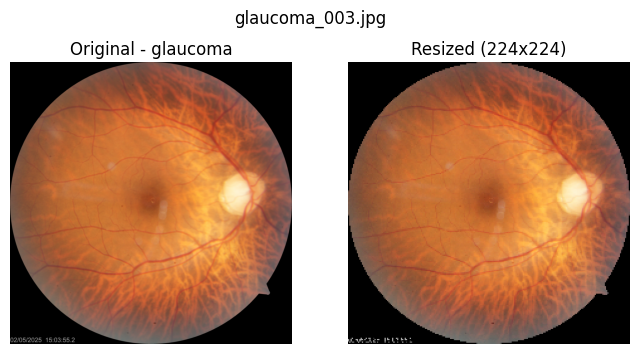

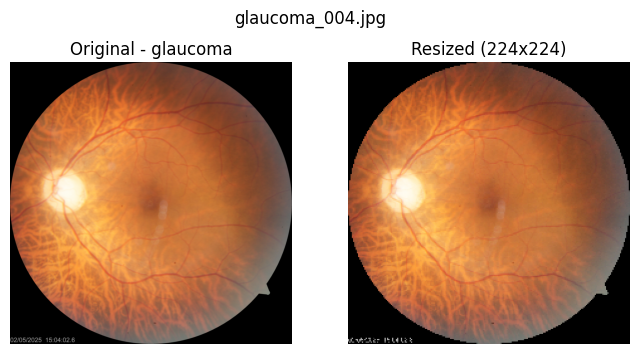

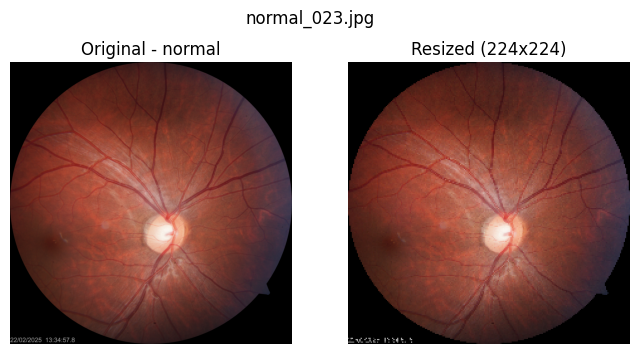

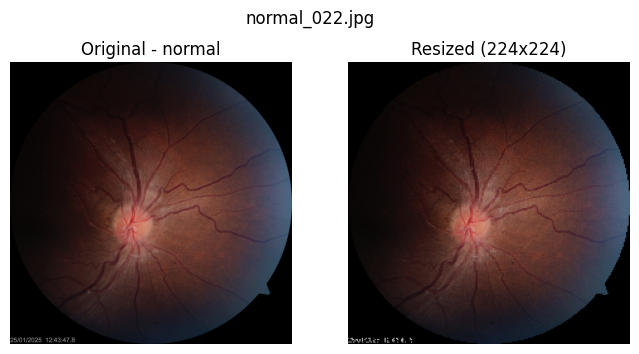

In [ ]:
def show_before_after(images_data):
    for orig, resized, label, name in images_data:
        plt.figure(figsize=(8, 4))

        plt.subplot(1, 2, 1)
        plt.imshow(orig)
        plt.title(f"Original - {label}")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(resized)
        plt.title("Resized (224x224)")
        plt.axis('off')

        plt.suptitle(name)
        plt.show()

show_before_after(sample_data)


In [ ]:
X = []
y = []

for idx, category in enumerate(categories):
    folder_path = os.path.join(base_dir, category)
    images = os.listdir(folder_path)

    for img_name in images:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = img / 255.0

        X.append(img)
        y.append(idx)

X = np.array(X)
y = np.array(y)

print("Total images:", len(X))
print("Shape:", X.shape)


Total images: 142
Shape: (142, 224, 224, 3)


In [ ]:
from sklearn.utils import shuffle

X_glaucoma = X[y == 0][:30]
y_glaucoma = y[y == 0][:30]

X_normal = X[y == 1][:30]
y_normal = y[y == 1][:30]

X_balanced = np.concatenate([X_glaucoma, X_normal], axis=0)
y_balanced = np.concatenate([y_glaucoma, y_normal], axis=0)

X_balanced, y_balanced = shuffle(X_balanced, y_balanced, random_state=42)

print("Balanced shape:", X_balanced.shape)


Balanced shape: (60, 224, 224, 3)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

vgg = VGG16(weights='imagenet', include_top=False,
            input_tensor=Input(shape=(224, 224, 3)))

for layer in vgg.layers:
    layer.trainable = False

x = vgg.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=vgg.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,926,209 (68.38 MB)

 Trainable params: 3,211,521 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=8,
    validation_data=(X_test, y_test)
)


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 785ms/step - accuracy: 0.6021 - loss: 0.6146 - val_accuracy: 0.5000 - val_loss: 0.7755
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.6536 - loss: 0.6205 - val_accuracy: 0.7500 - val_loss: 0.4847
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.8411 - loss: 0.3761 - val_accuracy: 0.7500 - val_loss: 0.4497
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8054 - loss: 0.3294 - val_accuracy: 0.6667 - val_loss: 0.4824
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9122 - loss: 0.2218 - val_accuracy: 0.8333 - val_loss: 0.3604
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9009 - loss: 0.2932 - val_accuracy: 0.7500 - val_loss: 0.4126
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8604 - loss: 0.2691 - val_accuracy: 0.6667 - val_loss: 0.4616
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8938 - loss: 0.2159 - val_accuracy: 0.6667 - val_loss: 0.476

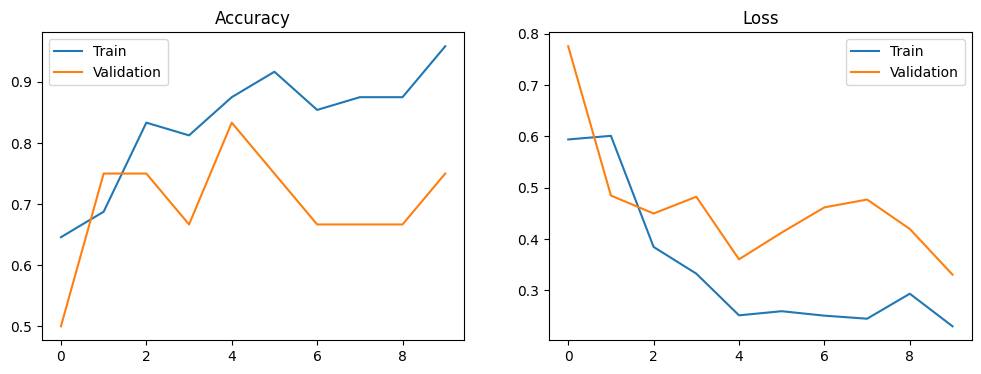

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['Train', 'Validation'])

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


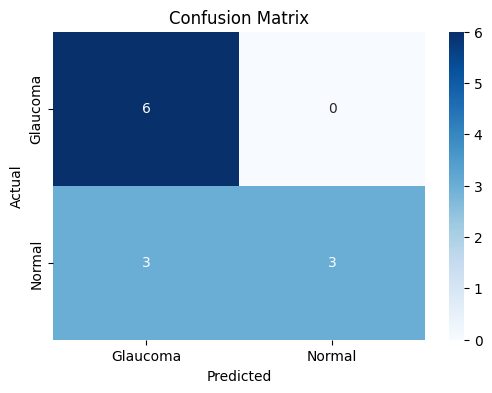

              precision    recall  f1-score   support

    Glaucoma       0.67      1.00      0.80         6
      Normal       1.00      0.50      0.67         6

    accuracy                           0.75        12
   macro avg       0.83      0.75      0.73        12
weighted avg       0.83      0.75      0.73        12



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int").flatten()

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Glaucoma', 'Normal'],
            yticklabels=['Glaucoma', 'Normal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred, target_names=['Glaucoma', 'Normal']))


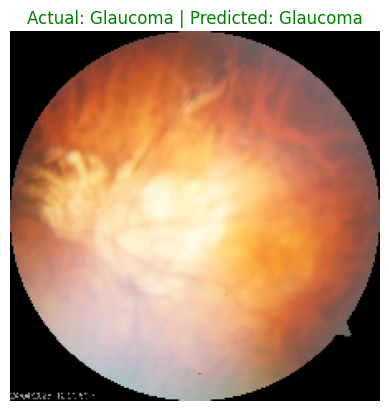

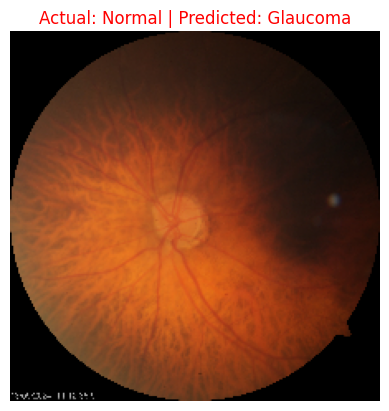

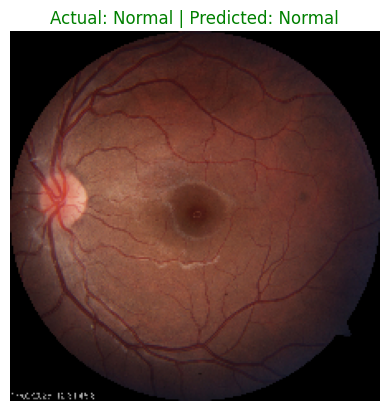

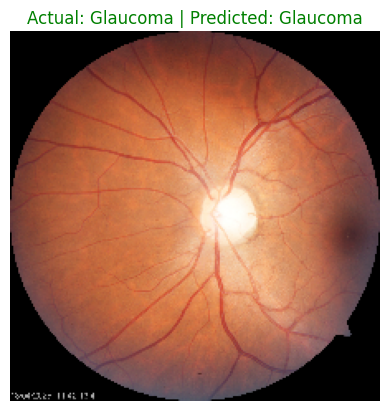

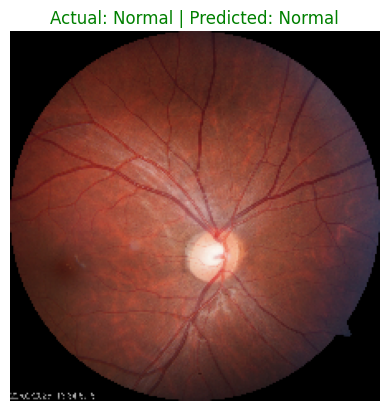

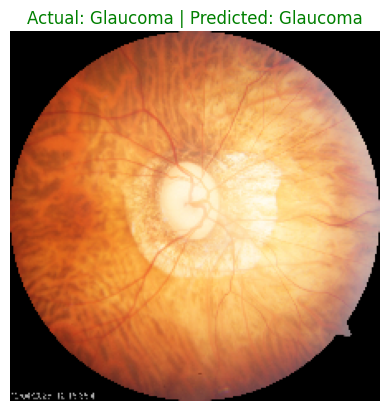

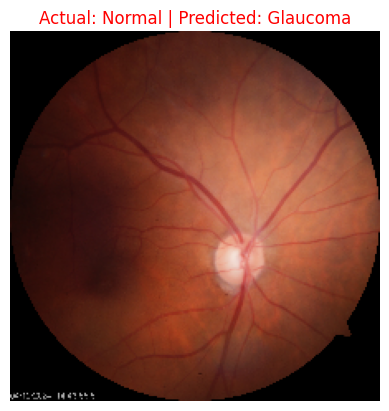

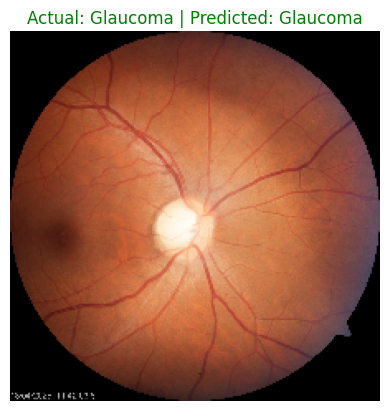

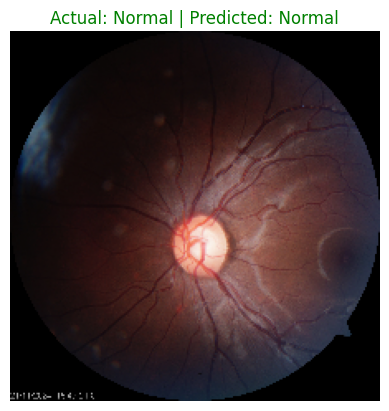

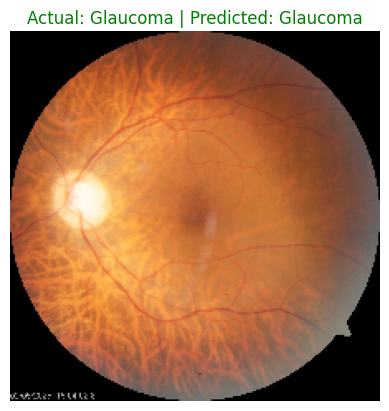

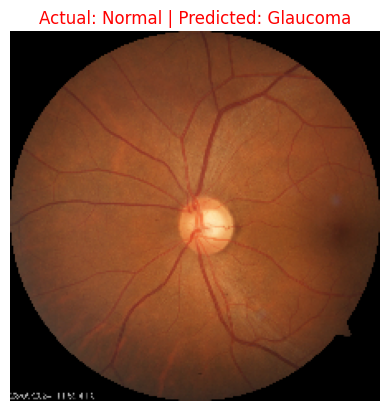

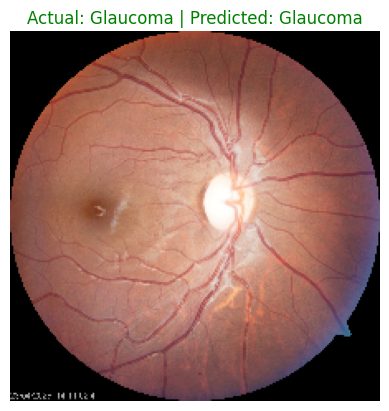

In [ ]:
for i in range(len(X_test)):
    plt.imshow(X_test[i])
    plt.axis('off')

    actual = "Glaucoma" if y_test[i] == 0 else "Normal"
    predicted = "Glaucoma" if y_pred[i] == 0 else "Normal"

    color = "green" if actual == predicted else "red"
    plt.title(f"Actual: {actual} | Predicted: {predicted}", color=color)
    plt.show()


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step - accuracy: 0.7500 - loss: 0.3306
Test Loss: 0.3306
Test Accuracy: 75.00%


In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
MODEL_PATH = "/content/drive/MyDrive/glaucoma_model.h5"

model.save(MODEL_PATH)
print("✅ Model saved at:", MODEL_PATH)


✅ Model saved at: /content/drive/MyDrive/glaucoma_model.h5


In [ ]:
# Required imports
import cv2
import numpy as np
import gradio as gr
from tensorflow.keras.models import load_model

# Constants
IMG_SIZE = 224
MODEL_PATH = "/content/drive/MyDrive/glaucoma_model.h5"  # <-- DEFINE IT HERE

# Save the trained model before loading it
model.save(MODEL_PATH)
print(f"Model saved to: {MODEL_PATH}")

# Load trained model
model = load_model(MODEL_PATH)

labels = ["glaucoma", "normal"]

def predict_glaucoma(image):
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    image = np.expand_dims(image, axis=0)

    pred = model.predict(image)[0]
    confidence = float(np.max(pred))
    # The model output is a single sigmoid value, so we compare it to 0.5
    result_idx = 0 if pred < 0.5 else 1 # Assuming 0 for glaucoma, 1 for normal based on y_balanced setup
    result = labels[result_idx]
    confidence = pred if result_idx == 1 else (1 - pred)

    return f"Prediction: {result}\nConfidence: {confidence*100:.2f}%"

# Gradio Interface
interface = gr.Interface(
    fn=predict_glaucoma,
    inputs=gr.Image(type="numpy", label="Upload Fundus Image"),
    outputs=gr.Textbox(label="Result"),
    title="Glaucoma Detection System",
    description="CNN-based Glaucoma Detection using Fundus Images"
)

interface.launch(debug=True)

Model saved to: /content/drive/MyDrive/glaucoma_model.h5


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://86575b3f9201064eb1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/protocols/http/httptools_impl.py", line 416, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/middleware/proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fastapi/applications.py", line 1139, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/applications.py", line 107, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py", line 186, in __call__
    raise exc
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/error

Created dataset file at: .gradio/flagged/dataset1.csv


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/protocols/http/httptools_impl.py", line 416, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/middleware/proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fastapi/applications.py", line 1139, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/applications.py", line 107, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py", line 186, in __call__
    raise exc
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/error

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/gradio/queueing.py", line 759, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/gradio/route_utils.py", line 354, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/gradio/blocks.py", line 2191, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/gradio/blocks.py", line 1698, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/anyio/to_thread.py", line 63, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
           ^^^^^

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://86575b3f9201064eb1.gradio.live


In [ ]:
!pip install streamlit pyngrok opencv-python-headless


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 119.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 133.3 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from google.colab import files


In [ ]:
IMG_SIZE = 224
MODEL_PATH = "/content/drive/MyDrive/glaucoma_model.h5"

model = load_model(MODEL_PATH)
labels = ["glaucoma", "normal"]

print("✅ Model loaded successfully")


✅ Model loaded successfully


Saving glaucoma_012.jpg to glaucoma_012.jpg


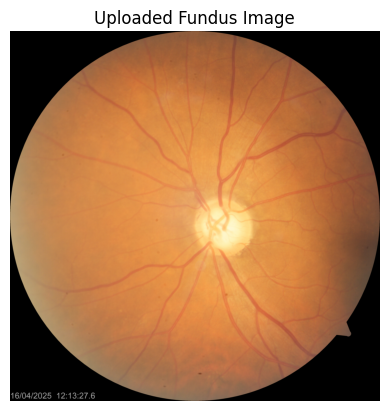

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
🔍 Prediction: GLAUCOMA
📊 Confidence: 4.46%


In [ ]:
uploaded = files.upload()

for file_name in uploaded.keys():
    img = cv2.imread(file_name)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Uploaded Fundus Image")
    plt.show()

    img_resized = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE))
    img_resized = img_resized / 255.0
    img_resized = np.expand_dims(img_resized, axis=0)

    pred = model.predict(img_resized)[0]
    result = labels[np.argmax(pred)]
    confidence = float(np.max(pred)) * 100

    print("🔍 Prediction:", result.upper())
    print(f"📊 Confidence: {confidence:.2f}%")
